In [ ]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"vamsi9392","key":"61f3230b15cbf3d5e34ca649f3404a4f"}'}

In [12]:
import os
import shutil

# Rename the weirdly named file to 'kaggle.json'
if os.path.exists("kaggle.json(1)"):
    os.rename("kaggle.json(1)", "kaggle.json")
elif os.path.exists("kaggle (1).json"):
    os.rename("kaggle (1).json", "kaggle.json")

# Create the .kaggle directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move kaggle.json to the .kaggle folder
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set correct permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

print("✅ kaggle.json configured successfully!")



✅ kaggle.json configured successfully!


In [13]:
!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip brazilian-ecommerce.zip

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [14]:
import pandas as pd

# Load datasets
orders = pd.read_csv("olist_orders_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
geo = pd.read_csv("olist_geolocation_dataset.csv")
cat_map = pd.read_csv("product_category_name_translation.csv")

# Preview
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
df = orders.merge(reviews, on="order_id", how="inner") \
           .merge(items, on="order_id", how="left") \
           .merge(products, on="product_id", how="left") \
           .merge(customers, on="customer_id", how="left")

In [19]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,shipping_delay,satisfaction
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,...,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,13.0,1
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,15898b543726a832d4137fbef5d1d00e,1,...,9000.0,42.0,12.0,39.0,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,12.0,0
11,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,15898b543726a832d4137fbef5d1d00e,1,...,9000.0,42.0,12.0,39.0,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113120,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,8ea780895f362ce949029f95b7181ff0,1,...,300.0,16.0,6.0,12.0,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR,37.0,0
113126,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,...,4950.0,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,22.0,1
113127,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,...,13300.0,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,24.0,1
113128,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,...,6550.0,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,17.0,0


In [20]:
# Feature engineering
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["shipping_delay"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days


In [21]:
df["satisfaction"] = df["review_score"].apply(lambda x: 1 if x >= 4 else 0)
df = df.dropna(subset=["review_comment_message", "shipping_delay"])

In [73]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [74]:
# Text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["review_comment_message"])
sequences = tokenizer.texts_to_sequences(df["review_comment_message"])
X_text = pad_sequences(sequences, maxlen=100)

In [75]:
features = ["price", "freight_value", "shipping_delay"]
X_struct = df[features].fillna(0)
scaler = StandardScaler()
X_struct_scaled = scaler.fit_transform(X_struct)


In [76]:
y = df["satisfaction"].values
y

array([1, 1, 1, ..., 1, 0, 0])

In [78]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [79]:
# Split data
X_text_train, X_text_test, X_struct_train, X_struct_test, y_train, y_test = train_test_split(
    X_text, X_struct_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [80]:
# Text model
text_input = Input(shape=(100,), name="text_input")
embed = Embedding(input_dim=10000, output_dim=64)(text_input)
lstm_out = LSTM(64)(embed)

In [81]:
struct_input = Input(shape=(X_struct_train.shape[1],), name="struct_input")

In [82]:
merged = Concatenate()([lstm_out, struct_input])
dense = Dense(64, activation="relu")(merged)
drop = Dropout(0.3)(dense)
output = Dense(1, activation="sigmoid")(drop)

model = Model(inputs=[text_input, struct_input], outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])




In [83]:
early = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    {"text_input": X_text_train, "struct_input": X_struct_train},
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early]
)


Epoch 1/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.8127 - loss: 0.4061 - val_accuracy: 0.9026 - val_loss: 0.2560
Epoch 2/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9200 - loss: 0.2291 - val_accuracy: 0.9065 - val_loss: 0.2482
Epoch 3/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.9325 - loss: 0.1912 - val_accuracy: 0.9046 - val_loss: 0.2615
Epoch 4/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.9429 - loss: 0.1669 - val_accuracy: 0.9006 - val_loss: 0.2750
Epoch 5/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.9489 - loss: 0.1499 - val_accuracy: 0.9044 - val_loss: 0.3113


In [84]:
# Predict
y_pred = model.predict({"text_input": X_text_test, "struct_input": X_struct_test})
y_pred_label = (y_pred > 0.5).astype(int)

# Report
print(classification_report(y_test, y_pred_label))


289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3361
           1       0.92      0.93      0.92      5867

    accuracy                           0.90      9228
   macro avg       0.90      0.89      0.89      9228
weighted avg       0.90      0.90      0.90      9228



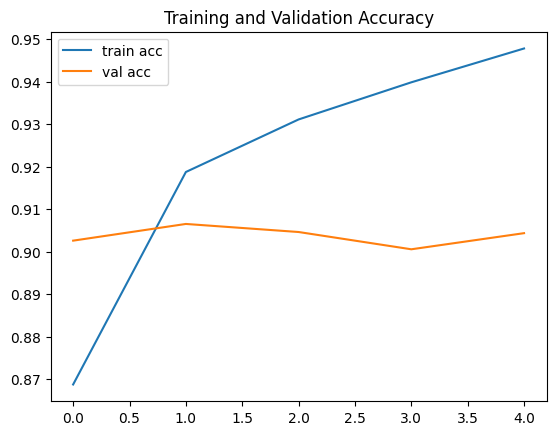

In [85]:
# Plot accuracy/loss
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

In [86]:
print(type(model))




<class 'keras.src.models.functional.Functional'>


In [87]:
model.save("model.h5")

In [88]:
# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

/tmp/ipython-input-43-685148529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="review_score", palette="viridis")


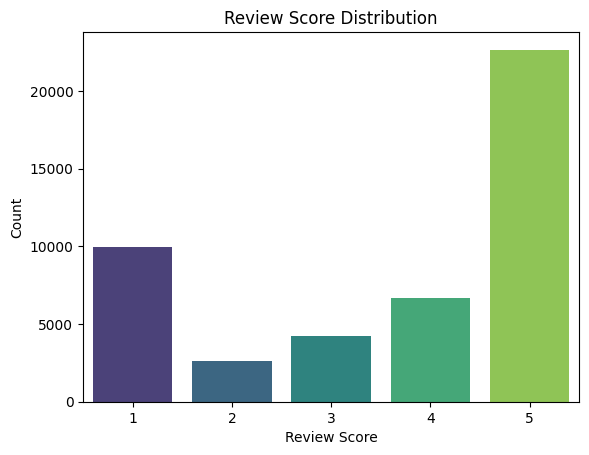

/tmp/ipython-input-43-685148529.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="satisfaction", palette="Set2")


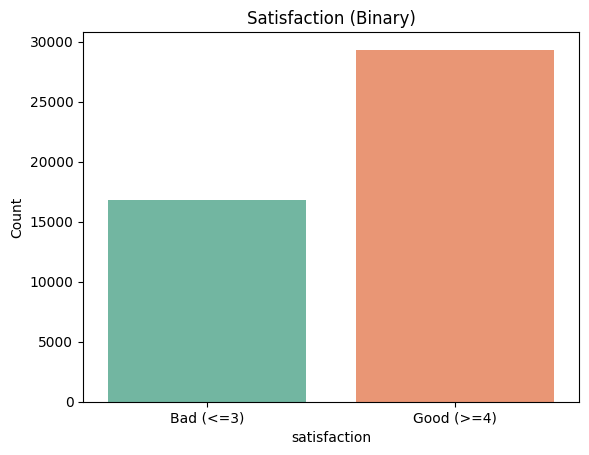

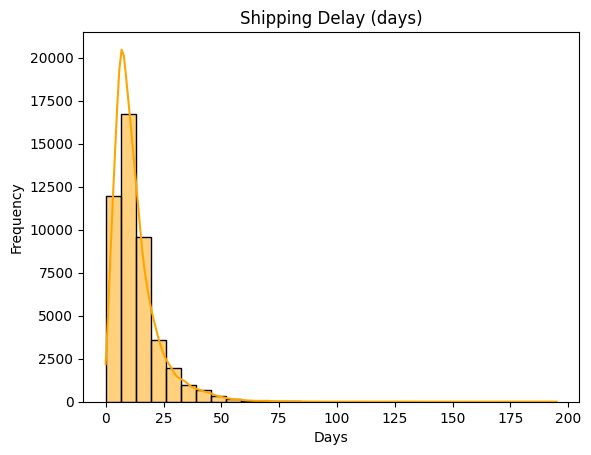

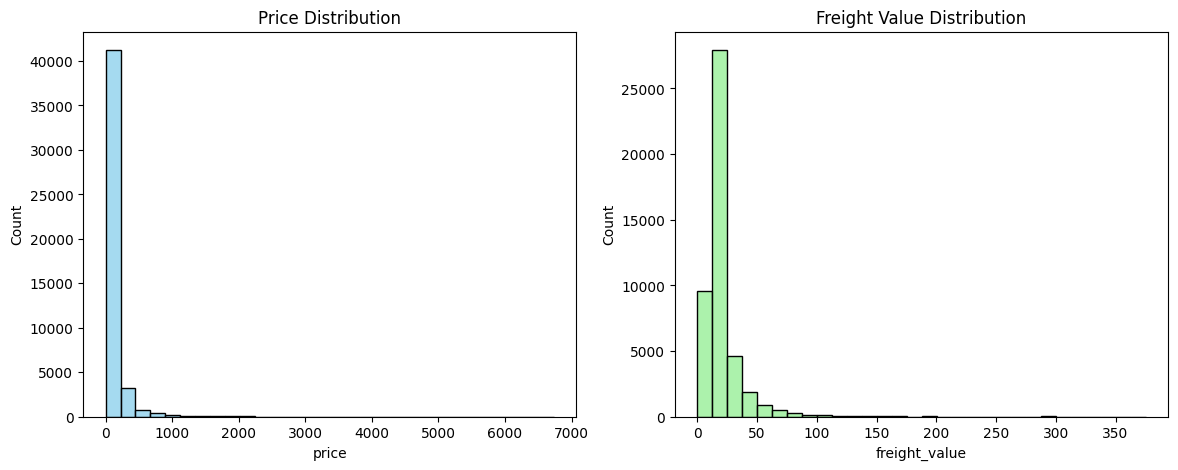

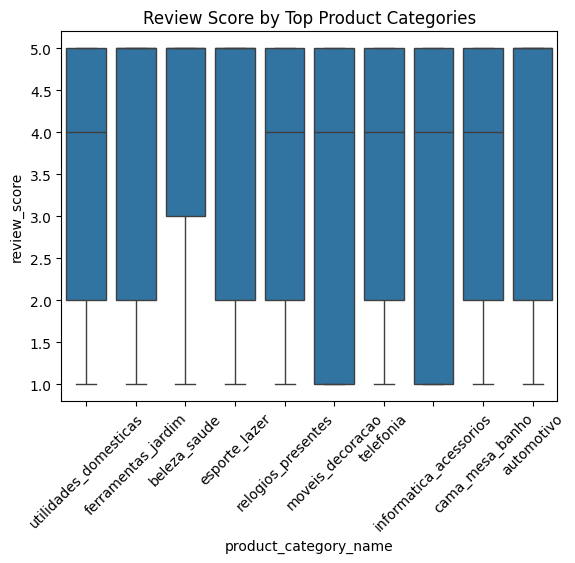

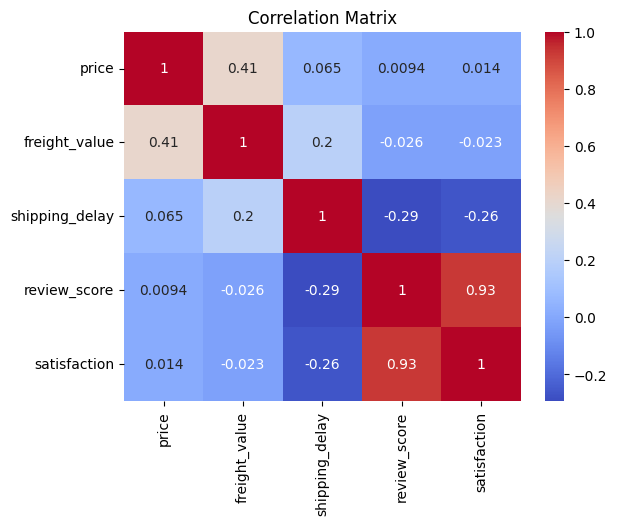

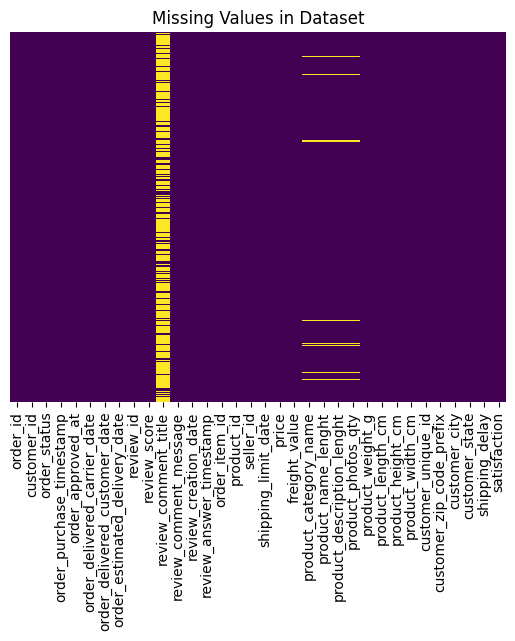

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Review Score Distribution ---
sns.countplot(data=df, x="review_score", palette="viridis")
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

# --- 2. Satisfaction (binary label) ---
sns.countplot(data=df, x="satisfaction", palette="Set2")
plt.title("Satisfaction (Binary)")
plt.xticks([0, 1], ["Bad (<=3)", "Good (>=4)"])
plt.ylabel("Count")
plt.show()

# --- 3. Shipping Delay Distribution ---
sns.histplot(df["shipping_delay"], bins=30, kde=True, color="orange")
plt.title("Shipping Delay (days)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# --- 4. Price and Freight Value ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["price"], bins=30, ax=ax[0], color="skyblue")
ax[0].set_title("Price Distribution")
sns.histplot(df["freight_value"], bins=30, ax=ax[1], color="lightgreen")
ax[1].set_title("Freight Value Distribution")
plt.show()

# --- 5. Satisfaction by Product Category ---
top_categories = df["product_category_name"].value_counts().head(10).index
sns.boxplot(
    data=df[df["product_category_name"].isin(top_categories)],
    x="product_category_name",
    y="review_score"
)
plt.xticks(rotation=45)
plt.title("Review Score by Top Product Categories")
plt.show()

# --- 6. Correlation Heatmap for Numeric Features ---
corr = df[["price", "freight_value", "shipping_delay", "review_score", "satisfaction"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# --- 7. Missing Value Heatmap ---
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values in Dataset")
plt.show()


In [44]:
# Save the model
model.save("model.h5")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


AttributeError: 'LogisticRegression' object has no attribute 'save'

In [35]:
products = products.merge(cat_map, on="product_category_name", how="left")

In [36]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


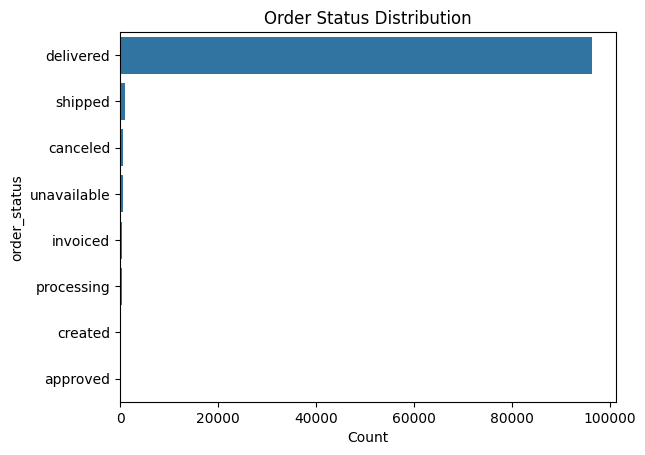

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=orders['order_status'], order=orders['order_status'].value_counts().index)
plt.title("Order Status Distribution")
plt.xlabel("Count")
plt.show()


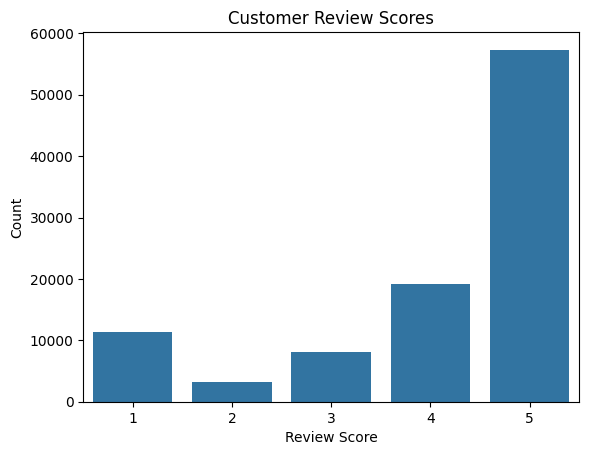

In [38]:
sns.countplot(x=reviews['review_score'])
plt.title("Customer Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()


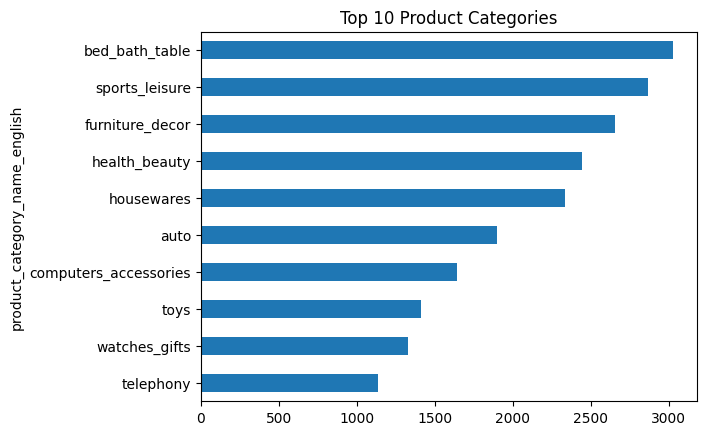

In [39]:
top_categories = products['product_category_name_english'].value_counts().head(10)
top_categories.plot(kind='barh', title='Top 10 Product Categories')
plt.gca().invert_yaxis()
plt.show()


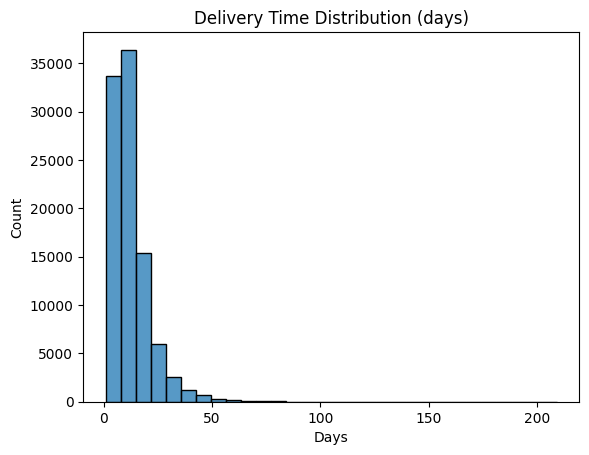

In [40]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders = orders[orders['delivery_days'] > 0]  # remove negative or null values

sns.histplot(orders['delivery_days'], bins=30)
plt.title("Delivery Time Distribution (days)")
plt.xlabel("Days")
plt.show()


In [41]:
import folium
from folium.plugins import HeatMap

# Reduce data size for mapping
geo_sample = geo.sample(5000)

m = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)
heat_data = [[row['geolocation_lat'], row['geolocation_lng']] for _, row in geo_sample.iterrows()]
HeatMap(heat_data).add_to(m)

m  # Will display in Colab


In [42]:
# Merge orders with reviews
orders_reviews = orders.merge(reviews, on="order_id")
orders_reviews['is_good_review'] = orders_reviews['review_score'].apply(lambda x: 1 if x >= 4 else 0)

# Select features
features = ['delivery_days']
X = orders_reviews[features].dropna()
y = orders_reviews.loc[X.index, 'is_good_review']

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.15      0.25      4049
           1       0.81      0.99      0.89     15221

    accuracy                           0.81     19270
   macro avg       0.79      0.57      0.57     19270
weighted avg       0.80      0.81      0.76     19270

